In [ ]:
!curl -L -O https://github.com/Deval2211/My-Random-ML-Projects/tree/master/Dataset/food_delivery.csv

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("/content/food_delivery.csv")
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


In [60]:
df.describe(include="all")

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN
top,NaN,NaN,NaN,NaN,Thai,NaN,NaN
freq,NaN,NaN,NaN,NaN,108,NaN,NaN
mean,250.500000,39.326000,29.714000,306.584680,NaN,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,NaN,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,NaN,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,NaN,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,NaN,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,NaN,4.400000,137.275000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


In [62]:
df.isnull().sum()

,0
UserID,0
Age,0
TotalOrders,0
AverageSpend,0
FavoriteCuisine,0
DeliveryRating,0
AppUsageTimePerDay,0


In [63]:
df = df.drop("UserID", axis=1)
display(df.head())

,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,Mexican,4.6,20.9
1,46,34,193.97,Mexican,3.0,150.2
2,32,22,291.66,Mexican,4.1,59.7
3,25,30,232.21,Thai,3.7,85.5
4,38,27,244.84,Italian,4.7,13.7


In [64]:
print(df['FavoriteCuisine'].unique())

['Mexican' 'Thai' 'Italian' 'Chinese' 'Indian']


In [65]:
df['FavoriteCuisine'] = df['FavoriteCuisine'].astype('category').cat.codes+1
pd.set_option('display.max_rows', None)

In [66]:
print(df['FavoriteCuisine'].unique())

[4 5 3 1 2]


<Axes: >

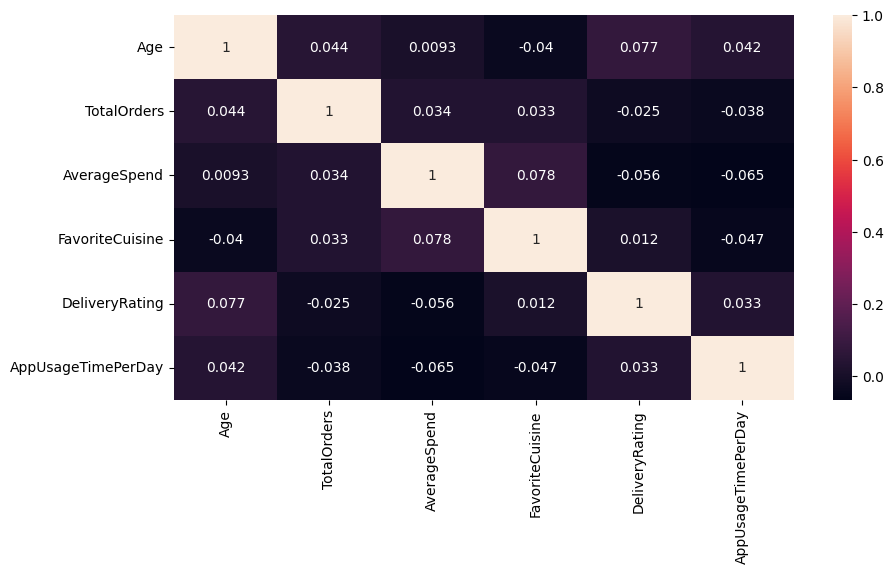

In [67]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),annot=True)

In [68]:
age_bins = [0, 30, 45, df['Age'].max()]
age_labels = ['<30', '30-45', '>45']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['AgeGroup'].value_counts()
print(age_group_counts)

AgeGroup
>45      185
30-45    169
<30      134
Name: count, dtype: int64


In [69]:
columns_to_average = df.select_dtypes(include=np.number).columns.tolist()
columns_to_average.remove('Age')
columns_to_average.remove('FavoriteCuisine')

average_by_age_group = df.groupby('AgeGroup')[columns_to_average].mean()


favorite_cuisine_mode_by_age_group = df.groupby('AgeGroup')['FavoriteCuisine'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Mode')

combined_age_group_analysis = pd.concat([average_by_age_group, favorite_cuisine_mode_by_age_group.rename('FavoriteCuisine_Mode')], axis=1)


print("\nAnalysis by Age Group (Averages and Favorite Cuisine Mode):")
display(combined_age_group_analysis)


Analysis by Age Group (Averages and Favorite Cuisine Mode):


/tmp/ipython-input-69-1831153930.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_by_age_group = df.groupby('AgeGroup')[columns_to_average].mean()
/tmp/ipython-input-69-1831153930.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  favorite_cuisine_mode_by_age_group = df.groupby('AgeGroup')['FavoriteCuisine'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'No Mode')


,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay,FavoriteCuisine_Mode
AgeGroup,,,,,
<30,29.291045,303.756791,3.647015,92.964925,5
30-45,29.538462,309.966154,3.776331,89.741420,2
>45,30.205405,302.235405,3.831892,97.232973,2


In [72]:
df = df.drop(["AgeGroup", "FavoriteCuisine"], axis=1)
display(df.head())

,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
0,56,37,312.70,4.6,20.9
1,46,34,193.97,3.0,150.2
2,32,22,291.66,4.1,59.7
3,25,30,232.21,3.7,85.5
4,38,27,244.84,4.7,13.7


In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df)

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(sc_df)

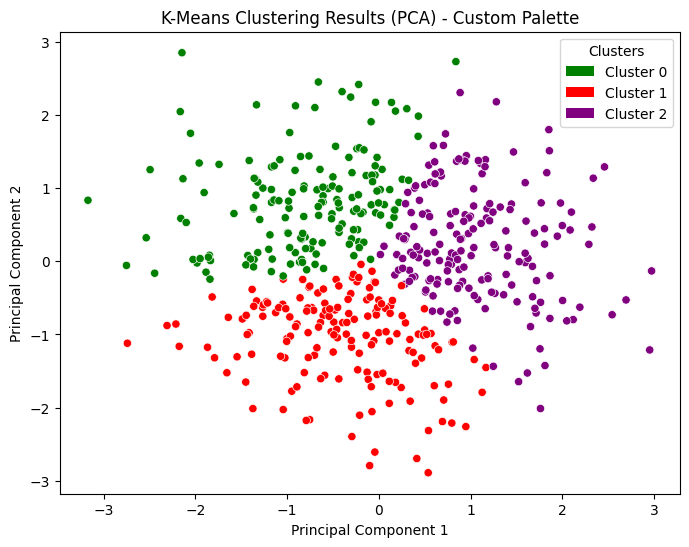

In [98]:
custom_palette = ['green', 'red', 'purple']
label_order = sorted(np.unique(km_df.labels_))
label_names = [f"Cluster {i}" for i in label_order]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=km_df.labels_,
                palette=dict(zip(label_order, custom_palette)), legend=False)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results (PCA) - Custom Palette')


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=custom_palette[i], label=label_names[i]) for i in range(len(label_names))]
plt.legend(handles=legend_elements, title='Clusters')
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(pca_df)



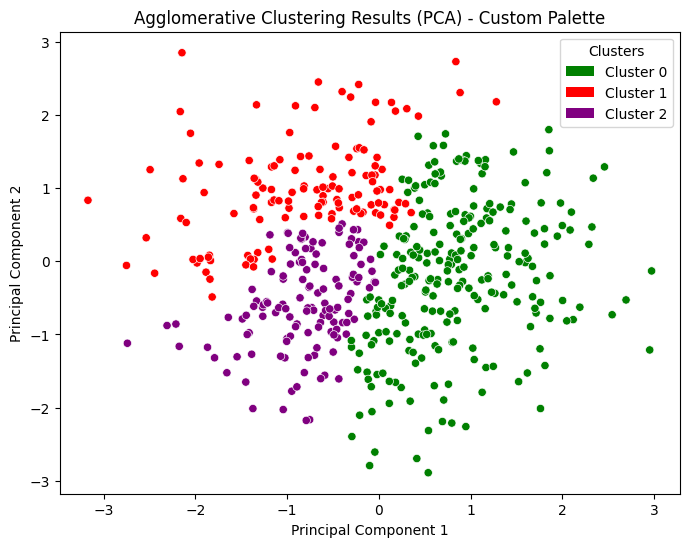

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=agg_labels,
                palette=dict(zip(sorted(np.unique(agg_labels)), custom_palette)), legend=False)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering Results (PCA) - Custom Palette')

legend_elements = [Patch(facecolor=custom_palette[i], label=f"Cluster {i}") for i in sorted(np.unique(agg_labels))]
plt.legend(handles=legend_elements, title='Clusters')
plt.show()

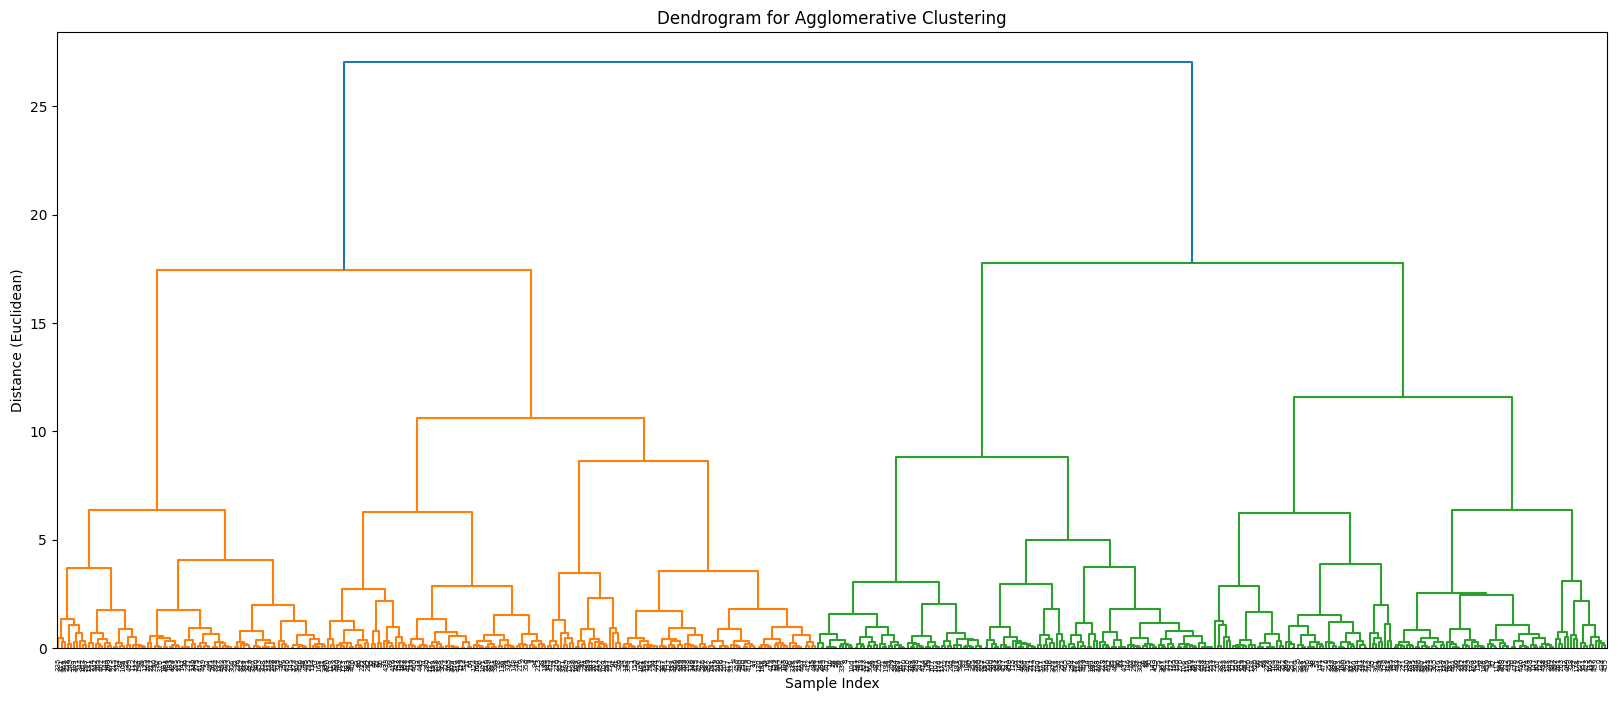

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 8))
dendrogram(linkage(pca_df, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Euclidean)')
plt.show()

In [106]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(sc_df)
df['DBSCAN_Cluster'] = dbscan_labels

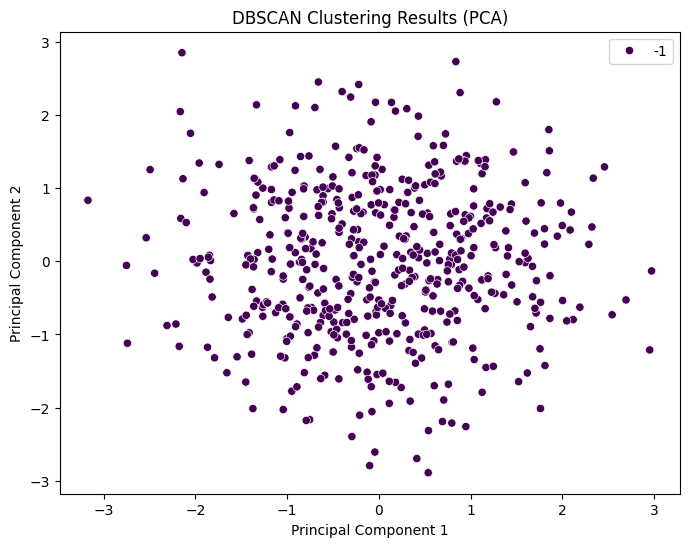


DBSCAN Cluster Distribution:
DBSCAN_Cluster
-1    500
Name: count, dtype: int64

Analysis of DBSCAN Clusters (excluding noise):


In [107]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=pca_df[:, 0], y=pca_df[:, 1], hue=dbscan_labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results (PCA)')
plt.show()

In [108]:
print("\nDBSCAN Cluster Distribution:")
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN Cluster Distribution:
DBSCAN_Cluster
-1    500
Name: count, dtype: int64


In [109]:
print("\nAnalysis of DBSCAN Clusters (excluding noise):")
for cluster_id in sorted(df['DBSCAN_Cluster'].unique()):
    if cluster_id != -1:
        print(f"\nCluster {cluster_id}:")
        cluster_data = df[df['DBSCAN_Cluster'] == cluster_id].drop('DBSCAN_Cluster', axis=1)
        display(cluster_data.describe())


Analysis of DBSCAN Clusters (excluding noise):
